# 1. Load data

In [88]:
import pandas as pd
import plotly.express as px
import geopandas as gpd
import matplotlib.pyplot as plt

all_birds = pd.read_csv('F:\\Python_projects\\state_of_birds_india\\birds_vis\\all_birds.csv')
ind_adm1 = gpd.read_file('F:\\Python_projects\\state_of_birds_india\\birds_vis\\IND_adm1.gpkg')
india = ind_adm1.to_crs(epsg='24378')

check

# 2. Plot no. of species found in each state or union territory

In [76]:
all_birds_vis = all_birds.groupby(by='source').count().reset_index().sort_values(by='Unnamed: 0', ascending=True)

fig_type = px.bar(all_birds_vis,  x ='Unnamed: 0', y= 'source',
                title= 'State-wise bird count',
                color = 'Unnamed: 0' , color_continuous_scale=['red','black'], text='Unnamed: 0')
#Axis titles
fig_type.update_layout(xaxis_title="Species count", yaxis_title='State')
#Remove colorbar
fig_type.update_coloraxes(showscale=False)
# Set the height of the figure to scale
fig_type.update_layout(height=1000)
fig_type.show()

In [112]:
state_wise = all_birds.groupby('source').count().sort_values(by='Unnamed: 0', ascending =False).reset_index()[['source', 'Unnamed: 0']]
state_wise.head(2)

,source,Unnamed: 0
0,West Bengal,693
1,Jammu and Kashmir,693


In [113]:
result = pd.merge(india, state_wise, how='left', left_on='NAME_1', right_on='source')
result.head(2)

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,source,Unnamed: 0
0,105,IND,India,1,Andaman and Nicobar Islands,Union Territor,Union Territory,None,Andaman & Nicobar Islands|Andaman et Nicobar|I...,"MULTIPOLYGON (((5841541.754 -1637673.605, 5841...",Andaman and Nicobar Islands,198
1,105,IND,India,2,Andhra Pradesh,State,State,None,None,"MULTIPOLYGON (((4139016.196 -1148993.573, 4139...",Andhra Pradesh,411


In [ ]:
import mapclassify

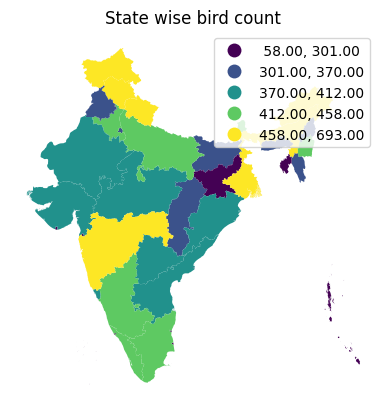

In [129]:
ax = result.plot(column = 'Unnamed: 0', scheme= 'quantiles', k=5,cmap='viridis', legend = True)
ax.set_title('State wise bird count')
ax.set_axis_off()
ax.autoscale()
plt.show()
